# <h1><center>**Tesla Stock Price Financial Analysis**</center></h1>

<h1><center><img src = "Tesla.jpg" style = "width: 400px; height: 250px"</center></h1>

# **Objective..!**
1. [**Import Python Libraries**](#0)<br>
2. [**Read in the CSV file as dataframe called Data**](#1)<br>
3. [**Plot Stock Data by Line Graph**](#2)<br>
4. [**Create New Column for Price Difference**](#3)<br>
5. [**Create New Column for Daily Return**](#4)<br>
6. [**Calculate the Profit**](#5)<br>

# **1. Import Python Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Read in the CSV file as dataframe called Data** 

In [2]:
data = pd.read_csv('C:\\Users\\Lenovo\\1.Projects\\30-days-of-data-analyst--main\\Day 1\\TSLA.csv')
print('Data import succesfully')

Data import succesfully


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [6]:
data.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


# **3. Plot Stock Data by Line Graph**

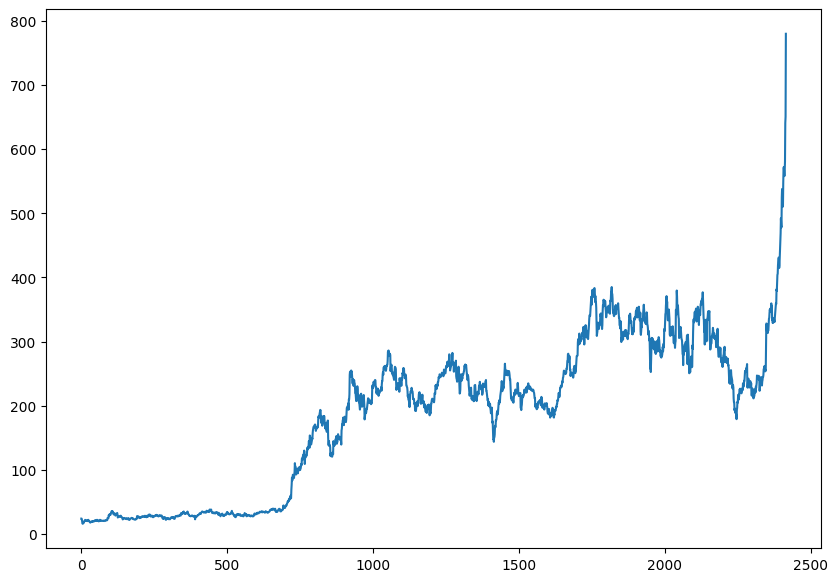

In [7]:
plt.figure(figsize = (10,7))
data['Close'].plot()
plt.show()

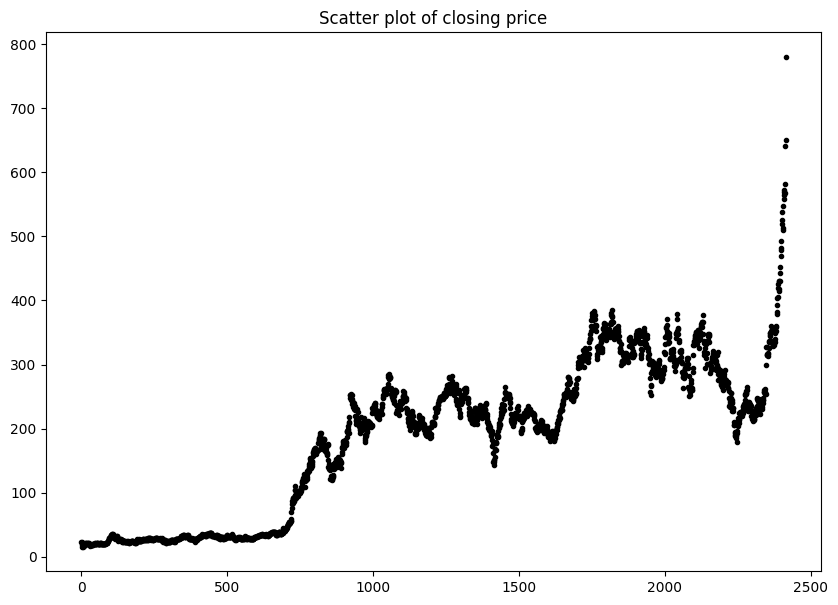

In [8]:
df_close = data['Close']
plt.figure(figsize=(10,7))
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

# **4. Create New Column for Price Difference**

In [9]:
data['price_diff'] = data['Close'].shift(-1)-data['Close']
data['price_diff']

0        -0.059999
1        -1.870001
2        -2.759998
3        -3.090000
4        -0.310001
           ...    
2411     14.089966
2412     59.820008
2413      9.760009
2414    129.429993
2415           NaN
Name: price_diff, Length: 2416, dtype: float64

# **Create New Column for Daily Return**

In [10]:
data['price_rn'] = data['price_diff']/data['Close']
data['price_rn']

0      -0.002511
1      -0.078473
2      -0.125683
3      -0.160937
4      -0.019243
          ...   
2411    0.024854
2412    0.102962
2413    0.015231
2414    0.198949
2415         NaN
Name: price_rn, Length: 2416, dtype: float64

# **5. Here we apply rolling widow calculation for 50 days**

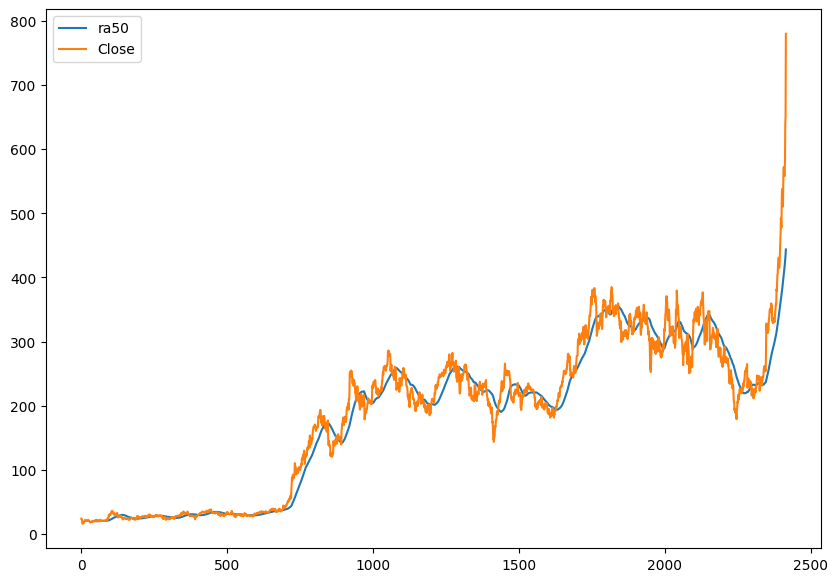

In [11]:
""" In statisctics a moving averege (rolling averege or running averege) is a calculation to analyze data points by creating a series of averege of differents subsets of different of the full data set.
It is also called a moving mean (MM) or rolling mean and is a type of  finite impulse response filter. Variation include : simple, cumulative, or weighted  forms (described bellow).
Highly used for financial analusis'"""

data['ra50'] = data['Close'].rolling(50).mean()
plt.figure(figsize = (10,7))
data['ra50'].plot()
data['Close'].plot()
plt.legend()
plt.show()

In [12]:
data['ra50'] = data['Close'].rolling(50).mean()
data['ra10'] = data['Close'].rolling(10).mean()

In [13]:
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,price_diff,price_rn,ra50,ra10
49,2010-09-08,20.660000,20.950001,20.600000,20.900000,20.900000,288400,-0.190001,-0.009091,19.833600,20.270000
50,2010-09-09,21.000000,21.049999,20.690001,20.709999,20.709999,376200,-0.539999,-0.026074,19.770000,20.351000
51,2010-09-10,20.750000,20.930000,19.760000,20.170000,20.170000,386600,0.549999,0.027268,19.696800,20.393000
52,2010-09-13,20.889999,20.900000,20.500000,20.719999,20.719999,360800,0.400002,0.019305,19.672000,20.495000
53,2010-09-14,20.540001,21.600000,20.530001,21.120001,21.120001,654700,0.859999,0.040720,19.710400,20.620000
...,...,...,...,...,...,...,...,...,...,...,...
2410,2020-01-27,541.989990,564.440002,539.280029,558.020020,558.020020,13608100,8.880004,0.015913,414.357601,541.707001
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,14.089966,0.024854,418.773402,545.911005
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,59.820008,0.102962,423.406202,550.218005
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,9.760009,0.015231,429.179001,562.449005


In [14]:
data['Shares'] = [1 if data.loc[ei, 'ra10'] > data .loc[ei, 'ra50'] else 0 for ei in data.index]

# **6. Calculate the Profit**

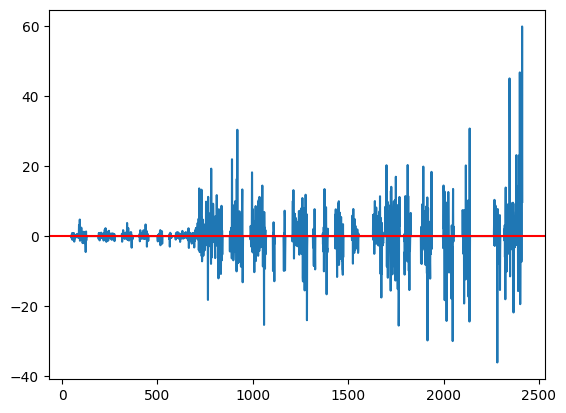

In [16]:
data['Close1'] = data['Close'].shift(-1)
data['Profit'] = [data.loc[ei, 'Close1'] - data.loc[ei, 'Close'] if data.loc[ei, 'Shares']==1 else 0 for ei in data.index]
data['Profit'].plot()
plt.axhline(y=0, color='red')

In [19]:
data['log_return'] = np.log(data['Close'].shift(-1)) - np.log(data['Close'])
data['log_return']

49     -0.009133
50     -0.026420
51      0.026903
52      0.019121
53      0.039912
          ...   
2410    0.015788
2411    0.024551
2412    0.097999
2413    0.015116
2414         NaN
Name: log_return, Length: 2366, dtype: float64

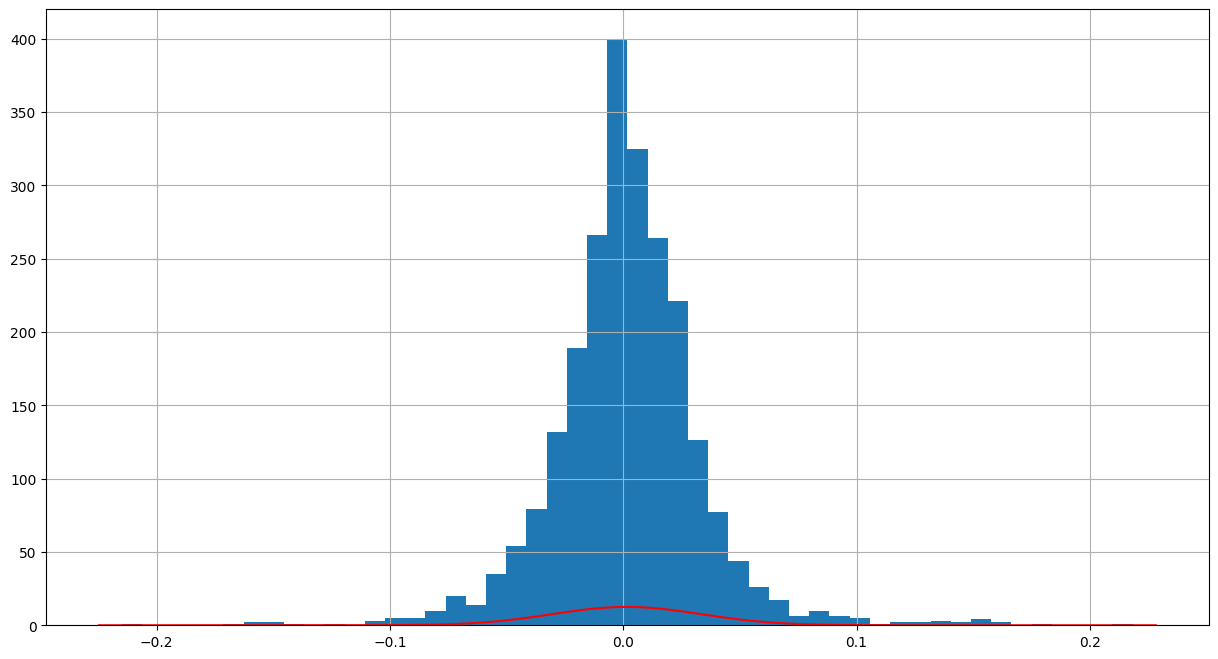

In [22]:

from scipy.stats import norm
mu = data['log_return'].mean()
sigma = data['log_return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(data['log_return'].min()-0.01, data['log_return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

data['log_return'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [24]:
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The Probability of dropping over 10% in one day', prob_return1)

The Probability of dropping over 10% in one day 0.00072723221548091


In [26]:
mu220 = 365 * mu
sigma220 = (365 ** 0.5) * sigma
drop20 = None
print('The probability of droping over 25% over a year:', drop20)

The probability of droping over 25% over a year: None


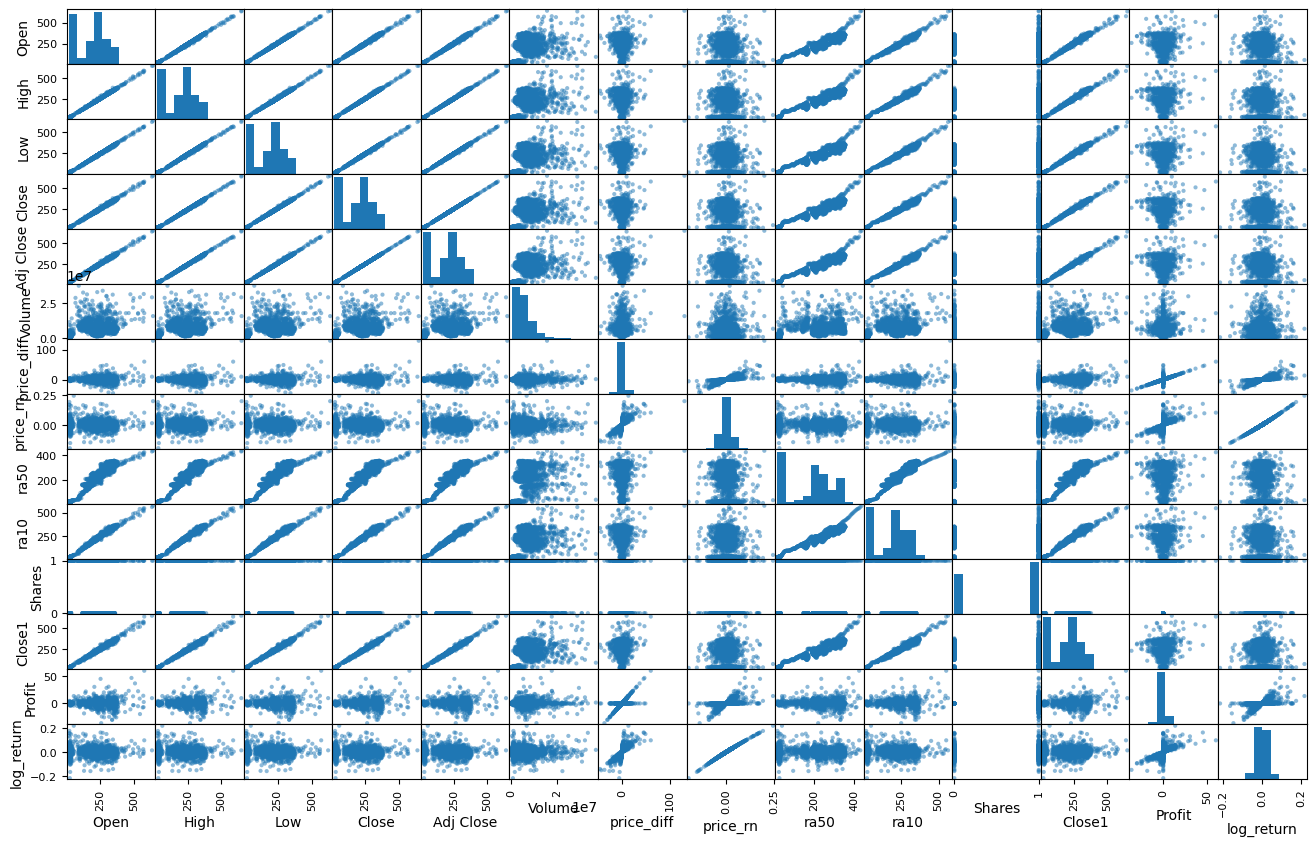

In [30]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data, figsize=(16,10))